In [14]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
preamble = """\\usepackage[T2A]{fontenc}
\\usepackage[utf8]{inputenc}
\\usepackage[bulgarian]{babel}
\\usepackage[]{siunitx}"""
LaTeX = {
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": preamble
}
plt.rcParams.update(LaTeX)

# очевидно това е размера на шрифта без значение какъв е той
plt.rcParams["font.size"] = 20
from uncertainties import ufloat

In [4]:
data = pd.DataFrame(pd.read_csv("surface_tension.csv"))

data = data.iloc[1:10, :7].astype(float)

rho = ufloat(997, 0.1)
g = ufloat(9.81, 0.01)
R = ufloat(0.563, 0.001) * 1/2000 

Text(0, 0.5, '$\\sigma, \\ \\si{mJ m^{-2}}$')

<Figure size 720x720 with 0 Axes>

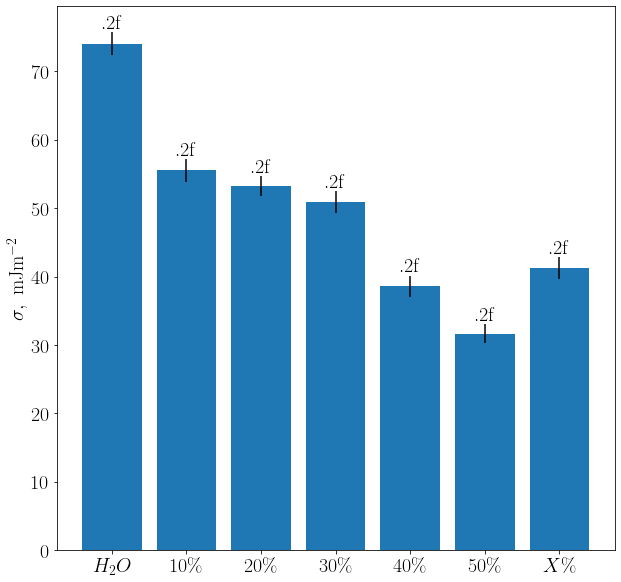

In [19]:
col_lengths = data.notnull().sum()
average = {key: data[key].mean()/1000 for key in data.columns}
errors = {key: (1/1000**2 + (data[key].std()/1000)**2/col_lengths[key])**0.5  for key in data.columns}
coeffs = {key: rho*g*R*ufloat(average[key], errors[key])/2 for key in data.columns}
plt.figure(figsize=(10, 10))

columns = [
    "$H_2 O$", 
    "$10\%$",
    "$20\%$",
    "$30\%$",
    "$40\%$",
    "$50\%$",
    "$X\%$",
]
fig, ax = plt.subplots(figsize=(10, 10))

bars = ax.bar(x=columns, height=[1000*coeffs[k].nominal_value for k in data.columns], yerr=[1000*coeffs[k].std_dev for k in data.columns])
ax.bar_label(bars, fmt="%.2f")
plt.ylabel("$\sigma, \ \si{mJ m^{-2}}$")
